# Time series

In [1]:
import numpy   as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#For this chapter alone
from datetime import datetime
from datetime import timedelta

In [3]:
now = datetime.now()
now

datetime.datetime(2019, 3, 25, 10, 5, 23, 760220)

In [4]:
now.year, now.month, now.day

(2019, 3, 25)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [6]:
delta.days, delta.seconds

(926, 56700)

In [8]:
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [10]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [11]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [13]:
#value = '2011-01-03'
#datetime.strptime(value, '%Y-%m-%d')
#datetime.datetime(2011, 1, 3, 0, 0)
datestrs = ['7/6/2011', '8/6/2011']

[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [14]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [16]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [17]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [19]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [20]:
pd

<module 'pandas' from '/Users/mkamaal/Workarea/MachineLearning/HandsOnMLSCTF/chapter2/env/lib/python3.7/site-packages/pandas/__init__.py'>

In [21]:
idx[2]

NaT

In [22]:
pd.isnull(idx)

array([False, False,  True])

In [23]:
dates = [datetime(2011, 1, 2), 
         datetime(2011, 1, 5),
         datetime(2011, 1, 7),
         datetime(2011, 1, 8),
         datetime(2011, 1, 10),
         datetime(2011, 1, 12)]
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [24]:
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    1.754592
2011-01-05   -0.330811
2011-01-07   -0.977666
2011-01-08   -0.038504
2011-01-10   -0.103393
2011-01-12    1.607484
dtype: float64

In [25]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [26]:
ts.dtypes

dtype('float64')

In [27]:
ts[::2]

2011-01-02    1.754592
2011-01-07   -0.977666
2011-01-10   -0.103393
dtype: float64

In [28]:
ts + ts[::2]

2011-01-02    3.509184
2011-01-05         NaN
2011-01-07   -1.955332
2011-01-08         NaN
2011-01-10   -0.206786
2011-01-12         NaN
dtype: float64

In [29]:
ts.index.dtype

dtype('<M8[ns]')

In [32]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [33]:
ts[stamp]

-0.9776661416561603

In [34]:
ts['1/10/2011']

-0.10339279220772667

In [36]:
ts['1/7/2011']

-0.9776661416561603

In [37]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.581992
2000-01-02   -0.795321
2000-01-03    1.458025
2000-01-04   -0.306662
2000-01-05    0.827208
2000-01-06   -0.130255
2000-01-07    0.766591
2000-01-08   -0.643170
2000-01-09   -0.903408
2000-01-10   -1.043826
2000-01-11    0.437352
2000-01-12   -0.230653
2000-01-13    0.073825
2000-01-14   -0.963581
2000-01-15    1.193596
2000-01-16    0.143588
2000-01-17   -0.560886
2000-01-18    0.445316
2000-01-19    1.263185
2000-01-20    0.908990
2000-01-21   -1.364221
2000-01-22   -0.504587
2000-01-23    0.107111
2000-01-24   -0.168153
2000-01-25   -0.839564
2000-01-26    0.393122
2000-01-27   -0.860853
2000-01-28    1.346443
2000-01-29    0.372174
2000-01-30    1.628097
                ...   
2002-08-28    0.781844
2002-08-29   -1.274885
2002-08-30    0.127338
2002-08-31   -0.298543
2002-09-01    0.163332
2002-09-02   -0.009838
2002-09-03    0.283579
2002-09-04   -0.253529
2002-09-05   -0.301486
2002-09-06   -0.213281
2002-09-07    0.305772
2002-09-08    1.570560
2002-09-09 

In [39]:
longer_ts['2001']

2001-01-01   -0.259926
2001-01-02    0.044486
2001-01-03    1.179031
2001-01-04    0.277295
2001-01-05    0.650073
2001-01-06   -0.103568
2001-01-07    0.179940
2001-01-08   -0.328597
2001-01-09    0.866556
2001-01-10   -1.059247
2001-01-11    0.069438
2001-01-12   -1.048846
2001-01-13    0.610842
2001-01-14    0.595840
2001-01-15   -0.313807
2001-01-16    0.734926
2001-01-17   -0.501436
2001-01-18   -2.165571
2001-01-19   -0.127013
2001-01-20   -0.048884
2001-01-21    0.519957
2001-01-22    1.619282
2001-01-23   -0.382087
2001-01-24    0.321953
2001-01-25    0.266601
2001-01-26    1.098593
2001-01-27    2.015587
2001-01-28   -2.117846
2001-01-29   -3.107436
2001-01-30    0.517303
                ...   
2001-12-02   -1.219838
2001-12-03    1.067541
2001-12-04   -1.371397
2001-12-05   -0.895032
2001-12-06   -0.891162
2001-12-07    1.015822
2001-12-08    0.725103
2001-12-09    0.539227
2001-12-10   -1.562354
2001-12-11   -0.702289
2001-12-12   -1.517027
2001-12-13   -1.789923
2001-12-14 

In [40]:
longer_ts['2001-05']

2001-05-01   -0.321741
2001-05-02    1.273649
2001-05-03   -0.658523
2001-05-04   -0.876474
2001-05-05    0.190774
2001-05-06    0.020198
2001-05-07    0.656210
2001-05-08    2.084774
2001-05-09    0.051138
2001-05-10    1.548430
2001-05-11    0.313535
2001-05-12    2.135706
2001-05-13    0.958843
2001-05-14    1.434092
2001-05-15    0.373856
2001-05-16    0.337582
2001-05-17   -0.302317
2001-05-18   -0.296469
2001-05-19   -0.593107
2001-05-20    1.018901
2001-05-21    1.618362
2001-05-22    1.394297
2001-05-23    0.946927
2001-05-24    1.280820
2001-05-25    0.667355
2001-05-26    1.647550
2001-05-27   -1.200477
2001-05-28    1.545995
2001-05-29    0.869198
2001-05-30   -0.212723
2001-05-31   -0.304476
Freq: D, dtype: float64

In [41]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.977666
2011-01-08   -0.038504
2011-01-10   -0.103393
2011-01-12    1.607484
dtype: float64

In [42]:
ts

2011-01-02    1.754592
2011-01-05   -0.330811
2011-01-07   -0.977666
2011-01-08   -0.038504
2011-01-10   -0.103393
2011-01-12    1.607484
dtype: float64

In [43]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.977666
2011-01-08   -0.038504
2011-01-10   -0.103393
dtype: float64

In [44]:
ts.truncate(after='1/9/2011')

2011-01-02    1.754592
2011-01-05   -0.330811
2011-01-07   -0.977666
2011-01-08   -0.038504
dtype: float64

In [46]:
dates   = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,0.019059,1.859253,0.177899,-0.704735
2001-05-09,-1.852989,-0.789039,-1.488470,2.102545
2001-05-16,0.321407,-1.382082,0.838640,0.508248
2001-05-23,-0.498210,-1.241470,1.898241,-0.288188
2001-05-30,-2.001179,0.808372,-0.361378,0.484696


In [50]:
long_df.loc['6-2001']

,Colorado,Texas,New York,Ohio
2001-06-06,-0.645007,0.700601,-0.199036,-1.236875
2001-06-13,-0.830393,0.658858,1.493296,-1.095712
2001-06-20,-0.677664,-0.484714,-0.937181,0.292964
2001-06-27,-1.135991,-0.463739,0.844341,-0.465070


In [51]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [52]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [53]:
dup_ts.index.is_unique

False

In [54]:
dup_ts['1/3/2000']

4

In [55]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [56]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [57]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [58]:
grouped

In [59]:
ts

2011-01-02    1.754592
2011-01-05   -0.330811
2011-01-07   -0.977666
2011-01-08   -0.038504
2011-01-10   -0.103393
2011-01-12    1.607484
dtype: float64

In [60]:
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [61]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [62]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [63]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [64]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [65]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [66]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [67]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

<Hour>

In [68]:
four_hours = Hour(4)

In [69]:
four_hours

<4 * Hours>

In [70]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [71]:
pd.date_range('2000-01-01', periods=20, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00',
               '2000-01-01 15:00:00', '2000-01-01 16:30:00',
               '2000-01-01 18:00:00', '2000-01-01 19:30:00',
               '2000-01-01 21:00:00', '2000-01-01 22:30:00',
               '2000-01-02 00:00:00', '2000-01-02 01:30:00',
               '2000-01-02 03:00:00', '2000-01-02 04:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [73]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

In [75]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.956243
2000-02-29    0.013301
2000-03-31    2.089475
2000-04-30   -1.064553
Freq: M, dtype: float64

In [76]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.956243
2000-04-30    0.013301
Freq: M, dtype: float64

In [77]:
ts.shift(-2)

2000-01-31    2.089475
2000-02-29   -1.064553
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [78]:
ts

2000-01-31   -0.956243
2000-02-29    0.013301
2000-03-31    2.089475
2000-04-30   -1.064553
Freq: M, dtype: float64

In [79]:
ts.shift(2, freq='M')

2000-03-31   -0.956243
2000-04-30    0.013301
2000-05-31    2.089475
2000-06-30   -1.064553
Freq: M, dtype: float64

In [80]:
ts.shift(3, freq='D')

2000-02-03   -0.956243
2000-03-03    0.013301
2000-04-03    2.089475
2000-05-03   -1.064553
dtype: float64

In [81]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.956243
2000-02-29 01:30:00    0.013301
2000-03-31 01:30:00    2.089475
2000-04-30 01:30:00   -1.064553
Freq: M, dtype: float64

In [82]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [83]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [84]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [85]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/5/2000', periods=20, freq='4d'))
ts

2000-01-05    1.501556
2000-01-09   -0.269491
2000-01-13   -1.282086
2000-01-17    1.162650
2000-01-21    0.073745
2000-01-25    0.361566
2000-01-29    1.144738
2000-02-02    1.363877
2000-02-06    0.410702
2000-02-10   -0.571719
2000-02-14    0.307680
2000-02-18   -0.821516
2000-02-22   -0.212111
2000-02-26    0.678174
2000-03-01    0.994053
2000-03-05    0.164321
2000-03-09    2.237112
2000-03-13    2.103251
2000-03-17    1.011094
2000-03-21   -0.151274
Freq: 4D, dtype: float64

In [86]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.384668
2000-02-29    0.165012
2000-03-31    1.059759
dtype: float64

In [88]:
ts.resample('M').mean()

2000-01-31    0.384668
2000-02-29    0.165012
2000-03-31    1.059759
Freq: M, dtype: float64

In [89]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [90]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [91]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts  = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.164386
2012-03-10 09:30:00   -0.856349
2012-03-11 09:30:00   -0.852162
2012-03-12 09:30:00   -0.052694
2012-03-13 09:30:00    1.532802
2012-03-14 09:30:00    1.986128
Freq: D, dtype: float64

In [92]:
print(ts.index.tz)

None


In [94]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.164386
2012-03-10 09:30:00+00:00   -0.856349
2012-03-11 09:30:00+00:00   -0.852162
2012-03-12 09:30:00+00:00   -0.052694
2012-03-13 09:30:00+00:00    1.532802
2012-03-14 09:30:00+00:00    1.986128
Freq: D, dtype: float64

In [95]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.164386
2012-03-10 04:30:00-05:00   -0.856349
2012-03-11 05:30:00-04:00   -0.852162
2012-03-12 05:30:00-04:00   -0.052694
2012-03-13 05:30:00-04:00    1.532802
2012-03-14 05:30:00-04:00    1.986128
Freq: D, dtype: float64

In [96]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts  = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-03-07 09:30:00   -1.007523
2012-03-08 09:30:00   -0.531518
2012-03-09 09:30:00    2.502632
2012-03-12 09:30:00   -1.486038
2012-03-13 09:30:00   -1.217581
2012-03-14 09:30:00   -0.525356
2012-03-15 09:30:00    0.700234
2012-03-16 09:30:00    0.121223
2012-03-19 09:30:00   -1.277759
2012-03-20 09:30:00    0.704784
Freq: B, dtype: float64

In [97]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    5.005264
2012-03-12 09:30:00+00:00   -2.972075
2012-03-13 09:30:00+00:00   -2.435162
2012-03-14 09:30:00+00:00   -1.050712
2012-03-15 09:30:00+00:00    1.400468
Freq: B, dtype: float64

In [98]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [99]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.141936
2000-02    1.629591
2000-03    0.621585
2000-04    0.793355
2000-05    0.268103
2000-06    0.173034
Freq: M, dtype: float64

In [100]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [101]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [102]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts  = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.624082
2007   -0.108180
2008   -0.427878
2009    0.704232
Freq: A-DEC, dtype: float64

In [103]:
ts.asfreq('M', how='start')

2006-01    0.624082
2007-01   -0.108180
2008-01   -0.427878
2009-01    0.704232
Freq: M, dtype: float64

In [104]:
data = pd.read_csv('../datasets/examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [105]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [106]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [107]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [108]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [109]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts  = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    1.200954
2000-01-02   -1.338211
2000-01-03   -0.557142
2000-01-04    0.669371
2000-01-05   -1.023924
2000-01-06    0.163776
2000-01-07   -0.124331
2000-01-08    0.842368
2000-01-09    0.190289
2000-01-10    1.005191
2000-01-11   -1.414349
2000-01-12    0.383665
2000-01-13    1.323904
2000-01-14    0.233190
2000-01-15    0.215107
2000-01-16    0.871202
2000-01-17   -0.664042
2000-01-18    0.563273
2000-01-19   -0.636147
2000-01-20   -1.775905
2000-01-21    0.326145
2000-01-22   -1.292065
2000-01-23    0.600655
2000-01-24   -1.172014
2000-01-25   -0.548087
2000-01-26    0.579355
2000-01-27    0.744259
2000-01-28   -0.000913
2000-01-29   -0.617481
2000-01-30    0.855115
                ...   
2000-03-11    1.546282
2000-03-12   -1.180721
2000-03-13   -0.276479
2000-03-14    2.262277
2000-03-15   -1.284261
2000-03-16   -0.555597
2000-03-17   -0.320932
2000-03-18   -1.322050
2000-03-19    0.971860
2000-03-20    0.077418
2000-03-21    0.624143
2000-03-22    0.589817
2000-03-23 

In [110]:
ts.resample('M').mean()

2000-01-31    0.045880
2000-02-29    0.013329
2000-03-31    0.122168
2000-04-30   -0.150286
Freq: M, dtype: float64

In [111]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts  = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [112]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [113]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [114]:
frame = pd.DataFrame(np.random.randn(2, 4), 
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.697017,1.107329,-0.075756,0.118129
2000-01-12,1.330110,0.685234,0.923084,3.317922


In [115]:
df_daily = frame.resample('D').asfreq()

In [116]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.697017,1.107329,-0.075756,0.118129
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.330110,0.685234,0.923084,3.317922


In [117]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.697017,1.107329,-0.075756,0.118129
2000-01-06,0.697017,1.107329,-0.075756,0.118129
2000-01-07,0.697017,1.107329,-0.075756,0.118129
2000-01-08,0.697017,1.107329,-0.075756,0.118129
2000-01-09,0.697017,1.107329,-0.075756,0.118129
2000-01-10,0.697017,1.107329,-0.075756,0.118129
2000-01-11,0.697017,1.107329,-0.075756,0.118129
2000-01-12,1.330110,0.685234,0.923084,3.317922


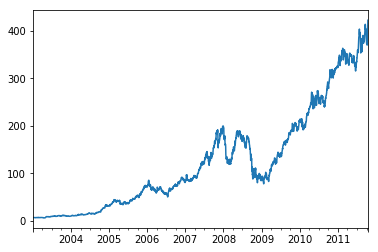

In [118]:
close_px_all = pd.read_csv('../datasets/examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px     = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px     = close_px.resample('B').ffill()
close_px.AAPL.plot()

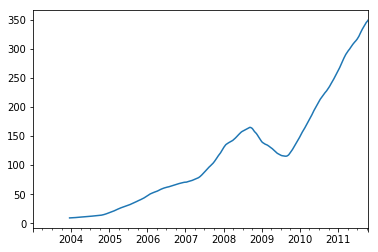

In [119]:
close_px.AAPL.rolling(250).mean().plot()